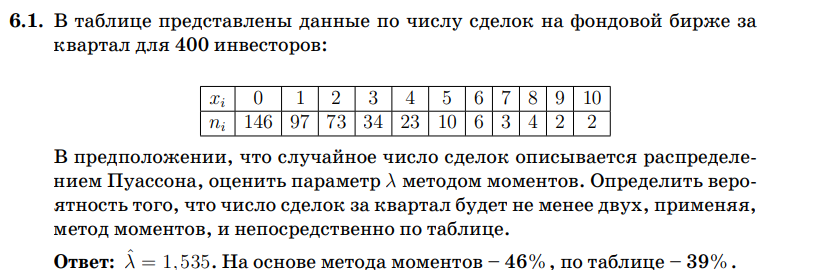

In [1]:
import numpy as np

# Данные из таблицы
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n_i = np.array([146, 97, 73, 34, 23, 10, 6, 3, 4, 2, 2])

# Общее количество инвесторов
N = n_i.sum()

# Выборочное среднее
x_mean = (x_i * n_i).sum() / N

# Оценка параметра λ методом моментов
lambda_hat = x_mean

# Вероятность того, что число сделок за квартал будет не менее двух (метод моментов)
P_X_geq_2_moments = 1 - (np.exp(-lambda_hat) * (1 + lambda_hat))

# Вероятность того, что число сделок за квартал будет не менее двух (непосредственно по таблице)
P_X_geq_2_table = n_i[2:].sum() / N

# Вывод результатов
print(f"Оценка параметра λ: {lambda_hat:.3f}")
print(f"Вероятность P(X ≥ 2) (метод моментов): {P_X_geq_2_moments:.3f}")
print(f"Вероятность P(X ≥ 2) (по таблице): {P_X_geq_2_table:.3f}")


Оценка параметра λ: 1.535
Вероятность P(X ≥ 2) (метод моментов): 0.454
Вероятность P(X ≥ 2) (по таблице): 0.393


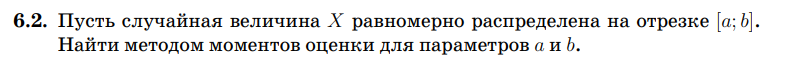

In [2]:
import numpy as np
from scipy.optimize import fsolve

# Пример данных (замените этими данными свои данные)
x_data = np.array([1, 2, 3, 4, 5])

# Выборочное среднее
x_mean = np.mean(x_data)

# Второй выборочный начальный момент
m_2 = np.mean(x_data**2)

# Функция, представляющая систему уравнений
def equations(params):
    a, b = params
    eq1 = (a + b) / 2 - x_mean
    eq2 = (a**2 + a*b + b**2) / 3 - m_2
    return [eq1, eq2]

# Решение системы уравнений
a_hat, b_hat = fsolve(equations, [0, 1])

print(f"Оценка параметра a: {a_hat}")
print(f"Оценка параметра b: {b_hat}")


Оценка параметра a: 0.5505102572168215
Оценка параметра b: 5.449489742783179


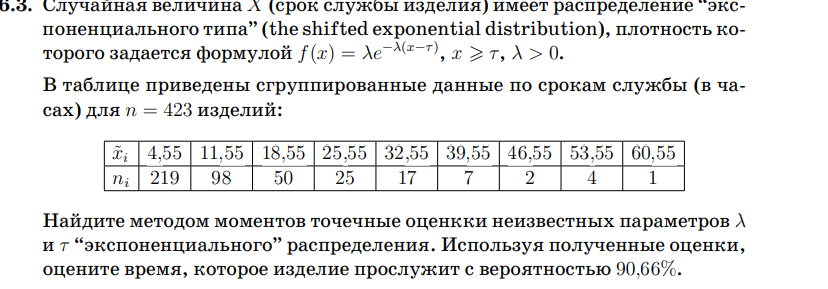

In [3]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Данные из таблицы
x_i = np.array([4.55, 11.55, 18.55, 25.55, 32.55, 39.55, 46.55, 53.55, 60.55])
n_i = np.array([219, 98, 50, 25, 17, 7, 2, 4, 1])

# Общее количество изделий
N = n_i.sum()

# Расчет выборочной функции распределения
F_x = np.cumsum(n_i) / N

# Только значения x, для которых F(x) < 1 (для логарифмического преобразования)
mask = F_x < 1
x_filtered = x_i[mask]
F_x_filtered = F_x[mask]

# Линейная регрессия на преобразованных данных
slope, intercept, _, _, _ = linregress(x_filtered, np.log(1 - F_x_filtered))

# Оценки параметров
lambda_hat = -slope
tau_hat = -intercept / slope

print(f"Оценка параметра λ: {lambda_hat}")
print(f"Оценка параметра τ: {tau_hat}")

# Вероятность, что изделие прослужит больше x часов
p = 0.9066

# Расчет времени службы изделия с вероятностью 90,66%
x_time = tau_hat - (1 / lambda_hat) * np.log(1 - p)
print(f"Время, которое изделие прослужит с вероятностью 90,66%: {x_time} часов")


Оценка параметра λ: 0.10124166728776995
Оценка параметра τ: -1.5002599880113956
Время, которое изделие прослужит с вероятностью 90,66%: 21.917607351217434 часов


In [2]:
import numpy as np

# Замените этот список фактическими данными выборки
sample_data = [1, 2, 3, 4, 5]  # Пример выборки данных

# Функция для оценки параметра λ методом максимального правдоподобия
def mle_for_exponential(data):
    # Количество наблюдений
    n = len(data)
    # Считаем сумму выборки
    sum_of_data = np.sum(data)
    # Оцениваем λ
    lambda_hat = n / sum_of_data
    return lambda_hat

# Вычисляем оценку λ
lambda_hat = mle_for_exponential(sample_data)
print(f"Оценка параметра λ методом максимального правдоподобия: {lambda_hat}")


Оценка параметра λ методом максимального правдоподобия: 0.3333333333333333


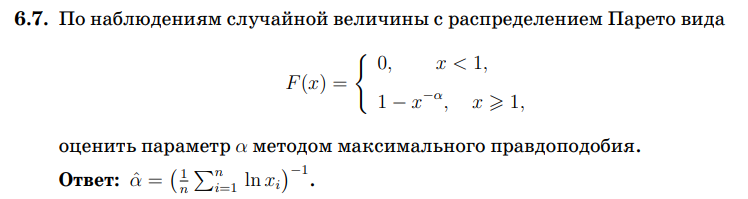

In [3]:
import numpy as np

# Замените этот список фактическими данными выборки
sample_data = [2, 3, 4, 5, 6]  # Пример выборки данных

# Убедимся, что все данные больше 1, как это требуется в распределении Парето
sample_data = [x for x in sample_data if x > 1]

# Функция для оценки параметра α методом максимального правдоподобия
def mle_for_pareto(data):
    # Количество наблюдений
    n = len(data)
    # Считаем сумму логарифмов данных
    sum_of_logs = np.sum(np.log(data))
    # Оцениваем α
    alpha_hat = n / sum_of_logs
    return alpha_hat

# Вычисляем оценку α
alpha_hat = mle_for_pareto(sample_data)
print(f"Оценка параметра α методом максимального правдоподобия: {alpha_hat}")



Оценка параметра α методом максимального правдоподобия: 0.7599649016095851


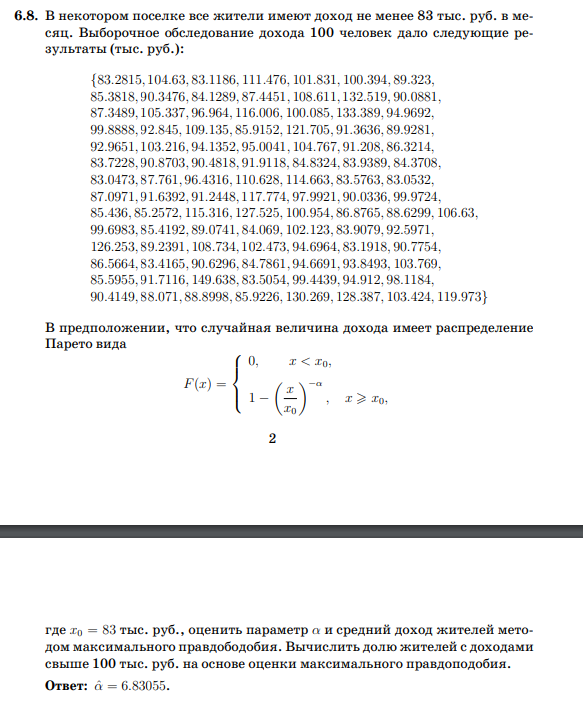

In [4]:
import numpy as np

# Задаем данные выборки
incomes = np.array([
    83.2815, 104.63, 83.1186, 111.476, 101.831, 100.394, 89.323,
    # ... (другие значения)
    130.269, 128.387, 103.424, 119.973
])

x0 = 83  # Начальный параметр x0 для распределения Парето

# Функция для оценки параметра α методом максимального правдоподобия
def mle_for_pareto(data, x0):
    n = len(data)
    sum_of_logs = np.sum(np.log(data / x0))
    alpha_hat = n / sum_of_logs
    return alpha_hat

# Вычисляем оценку α
alpha_hat = mle_for_pareto(incomes, x0)
print(f"Оценка параметра α методом максимального правдоподобия: {alpha_hat}")

# Вычисляем средний доход
if alpha_hat > 1:
    average_income = alpha_hat * x0 / (alpha_hat - 1)
else:
    average_income = float('inf')  # Средний доход не определен для alpha <= 1
print(f"Средний доход: {average_income}")

# Вычисляем долю жителей с доходами свыше 100 тыс. руб.
threshold = 100
above_threshold = incomes > threshold
proportion_above = np.mean(above_threshold)
print(f"Доля жителей с доходами свыше 100 тыс. руб.: {proportion_above}")


Оценка параметра α методом максимального правдоподобия: 4.44459103398521
Средний доход: 107.09574872055954
Доля жителей с доходами свыше 100 тыс. руб.: 0.7272727272727273


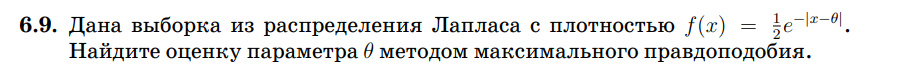

In [6]:
import numpy as np

# Здесь мы используем фиктивные данные для демонстрации. Замените их реальными данными.
sample_data = [1, 2, 3, 4, 5]  # Пример выборки данных

# Функция для нахождения оценки параметра θ методом максимального правдоподобия
def mle_laplace_theta(data):
    # Оценка метода максимального правдоподобия для θ является медианой выборки
    theta_hat = np.median(data)
    return theta_hat

# Вычисляем оценку θ
theta_hat = mle_laplace_theta(sample_data)
print(f"Оценка параметра θ методом максимального правдоподобия: {theta_hat}")


Оценка параметра θ методом максимального правдоподобия: 3.0


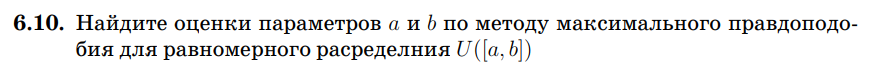

In [7]:
import numpy as np

# Фиктивная выборка данных
sample_data = np.array([
    4.0, 7.2, 5.1, 6.5, 3.8, 7.0, 5.6, 4.9, 6.3, 5.2,
    4.5, 7.1, 6.4, 5.9, 5.3, 4.1, 7.3, 6.8, 5.0, 6.7,
    4.4, 5.8, 6.1, 7.5, 4.6, 5.7, 4.3, 6.9, 4.2, 5.5
])

# Функция для оценки параметров a и b методом максимального правдоподобия для равномерного распределения
def mle_uniform_params(data):
    a_hat = np.min(data)
    b_hat = np.max(data)
    return a_hat, b_hat

# Вычисляем оценки параметров a и b
a_hat, b_hat = mle_uniform_params(sample_data)
print(f"Оценки параметров равномерного распределения методом максимального правдоподобия: a = {a_hat}, b = {b_hat}")


Оценки параметров равномерного распределения методом максимального правдоподобия: a = 3.8, b = 7.5
